In [1]:
#このコードはGoogle Colabの環境でTensorFlow2のライブラリーを使用するためのコードです。
try:
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


# 可視化用のデータの作成
KerasのMNISTのテストデータから、0～9の各ラベルに対して、n_sample(100)個、n_sample=100の場合は1000個サンプルを取り出して並べる。

In [2]:
import numpy as np
from keras.datasets import mnist

def load_visualize_data(n_sample):
    (_, _), (X_test, y_test) = mnist.load_data()
    X = np.zeros((n_sample * 10, X_test.shape[1], X_test.shape[2]))
    y = np.zeros(n_sample*10)
    for num in range(10):
        dest_indices = np.arange(num*n_sample, (num+1)*n_sample)
        source_indices = np.where(y_test == num)[0][:n_sample]
        X[dest_indices, :, :] = X_test[source_indices, :, :]
        y[dest_indices] = y_test[source_indices]
    return X, y

Using TensorFlow backend.


# t-SNEを用いた可視化

11493376/11490434 [==============================] - 0s 0us/step


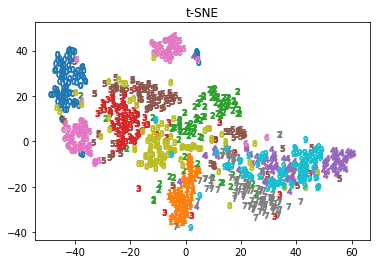

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap
from sklearn.manifold import TSNE
from sklearn.metrics import explained_variance_score

X, y = load_visualize_data(100)
X /= 255
X = X.reshape(X.shape[0], -1)

decomp = TSNE(n_components=2)
X_decomp = decomp.fit_transform(X)

cmap = get_cmap("tab10")
for i in range(10):
    marker = "$" + str(i) + "$"
    indices = np.arange(i*100, (i+1)*100)
    plt.scatter(X_decomp[indices, 0], X_decomp[indices, 1], marker=marker, color=cmap(i))
plt.title(f"t-SNE")
plt.show()